In [3]:
#IMPORTS
import os 
import json
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from typing import *

from utils import *

In [4]:
#READ CONFIG
config_dict = json.load(open("./config.json"))

In [5]:
train_classes = []; test_classes = []; val_classes = []
train_classes = os.listdir(config_dict['dataset']['train_path'])
test_classes = os.listdir(config_dict['dataset']['test_path'])
val_classes = os.listdir(config_dict['dataset']['val_path'])

In [6]:
config_dict['train_classes'] = len(train_classes)
config_dict['val_classes'] = len(val_classes)
config_dict['test_classes'] = len(test_classes)
config_dict['train_classes_list_debug'] = train_classes
config_dict['val_classes_list_debug'] = val_classes
config_dict['test_classes_list_debug'] = test_classes
   

In [7]:
print_config(config_dict)
train_class_distrib = class_distribution(config_dict['dataset']['train_path'],config_dict['train_classes_list_debug'])
val_class_distrib = class_distribution(config_dict['dataset']['val_path'],config_dict['val_classes_list_debug'])
test_class_distrib = class_distribution(config_dict['dataset']['test_path'],config_dict['test_classes_list_debug'])


dataset : {'root_path': '/home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size', 'train_path': '/home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size/train', 'test_path': '/home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size/test', 'val_path': '/home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size/val'}
train_classes : 64
val_classes : 16
test_classes : 20


Text(0, 0.5, 'Classes')

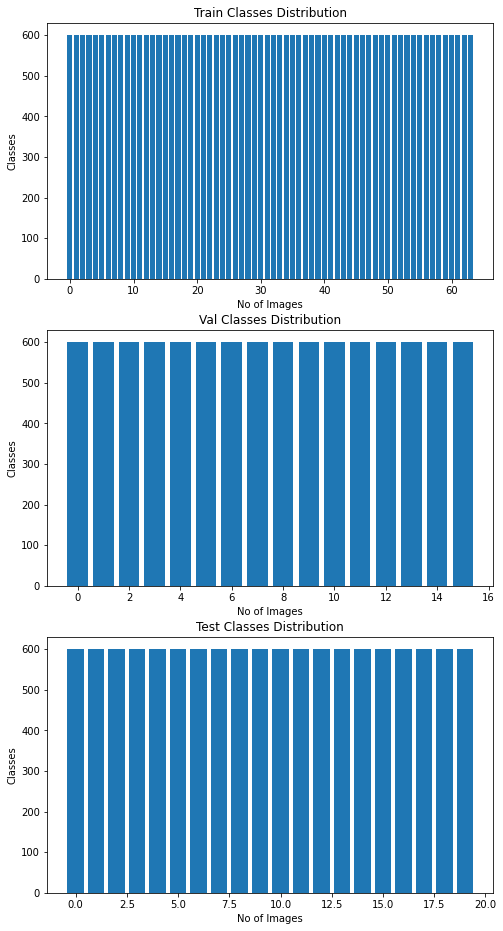

In [8]:
fig = plt.figure(figsize=(8,16))

fig.add_subplot(3,1,1)
plt.bar(list(range(len(train_class_distrib.keys()))), train_class_distrib.values())
plt.title("Train Classes Distribution")
plt.xlabel("No of Images")
plt.ylabel("Classes")


fig.add_subplot(3,1,2)
plt.bar(list(range(len(val_class_distrib.keys()))), val_class_distrib.values())
plt.title("Val Classes Distribution")
plt.xlabel("No of Images")
plt.ylabel("Classes")

fig.add_subplot(3,1,3)
plt.bar(list(range(len(test_class_distrib.keys()))), test_class_distrib.values())
plt.title("Test Classes Distribution")
plt.xlabel("No of Images")
plt.ylabel("Classes")


In [9]:
train_imgs = sample_imgs(config_dict['dataset']['train_path'],config_dict['train_classes_list_debug'],0.1,2)

Image of class type: n02105505


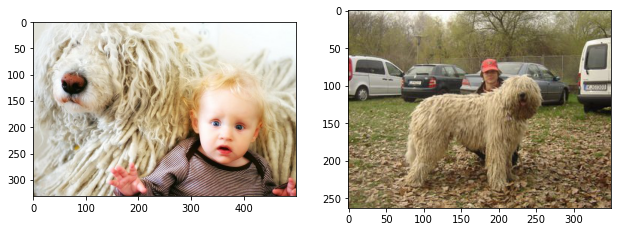

In [10]:
print(f"Image of class type: {list(train_imgs.keys())[0]}")
plot_images_grid(3,3,list(train_imgs.values())[0],figsize=(16,16))

Image of class type: n04296562


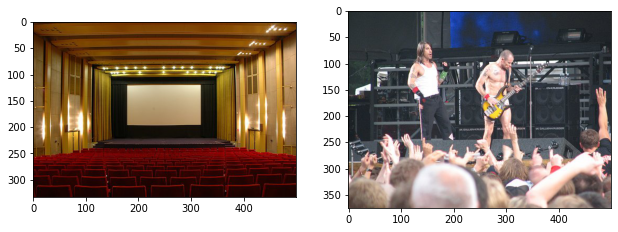

In [11]:
print(f"Image of class type: {list(train_imgs.keys())[1]}")
plot_images_grid(3,3,list(train_imgs.values())[1],figsize=(16,16))

In [12]:
from datasets.dataset import MiniImageNetDataset

mini_imagenet_dataset = MiniImageNetDataset(config_dict['dataset']['root_path'],N_way=5,K_shot=5)

No of classes in /home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size/train are 64
No of classes in /home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size/val are 16
No of classes in /home/azureuser/cloudfiles/code/Users/asahu.cool/Work/Datasets/MiniImageNet/mini_imagenet_full_size/test are 20
